In [3]:
import pandas as pd

In [4]:
#abrindo e exportando dados

url = 'https://raw.githubusercontent.com/caio-c-silva/algoritmos/main/notebooks_atividades/spotify-2023_modificado.csv'

df = pd.read_csv(url)

In [ ]:
df.head() #mostra as 5 posições

,titulo,artista,ano,mes,dia,bpm,tom,modo,reproducoes_milhoes
0,seven (feat. latto) (explicit ver.),"latto, jung kook",2023,7,14,125,B,maior,141.38
1,lala,myke towers,2023,3,23,92,C#,maior,133.72
2,vampire,olivia rodrigo,2023,6,30,138,F,maior,140.00
3,cruel summer,taylor swift,2019,8,23,170,A,maior,800.84
4,where she goes,bad bunny,2023,5,18,144,A,menor,303.24


In [ ]:
# 1 Qual a música mais antiga presente no conjunto de dados?

musica_antiga = df[(df['ano'] == df['ano'].min())]
display(musica_antiga)


,titulo,artista,ano,mes,dia,bpm,tom,modo,reproducoes_milhoes
439,agudo mï¿½ï¿½gi,"styrx, utku inc, thezth",1930,1,1,130,F#,menor,90.6


In [ ]:
# 2 Qual a última musica a ser lançada que está presente no conjunto de dados?

mes = df['mes'].astype(str).copy()
dia = df['dia'].astype(str).copy()

df['data'] = pd.to_datetime(df['ano'].astype(str).str.cat(mes, sep ='/').str.cat(dia, sep ='/'))
df[(df['data'] == df['data'].max())]

#musica_recente = df[(df['data'] == df['data'].max())]
#display(musica_recente)

In [ ]:
# 3 Crie um novo dataframe contendo as 10 músicas mais reproduzidas que foram gravadas pela cantora Taylor Swift.

taylor = df[(df['artista'] == 'taylor swift')]
display(taylor.sort_values(by='reproducoes_milhoes', ascending=False )[0:10])

,titulo,artista,ano,mes,dia,bpm,tom,modo,reproducoes_milhoes
37,blank space,taylor swift,2014,1,1,96,F,maior,1355.96
176,shake it off,taylor swift,2014,1,1,160,G,maior,1113.84
33,anti-hero,taylor swift,2022,10,21,97,E,maior,999.75
100,lover,taylor swift,2012,1,1,206,G,maior,882.83
59,cardigan,taylor swift,2020,7,24,130,NaN,menor,812.02
3,cruel summer,taylor swift,2019,8,23,170,A,maior,800.84
38,style,taylor swift,2014,1,1,95,D,maior,786.18
93,donï¿½ï¿½ï¿½t bl,taylor swift,2017,11,8,136,A,menor,685.03
163,enchanted,taylor swift,2010,1,1,164,G#,maior,621.66
119,august,taylor swift,2020,7,24,90,F,maior,607.12


<Axes: >

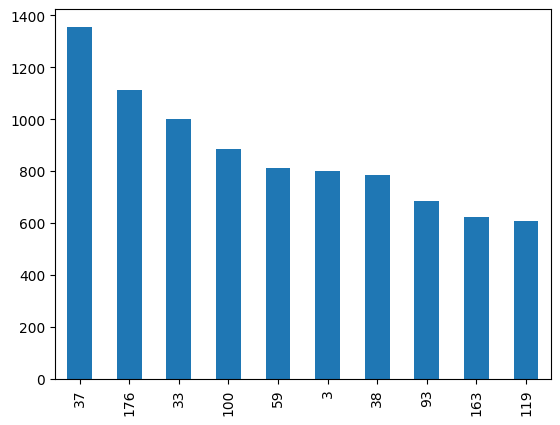

In [ ]:
# 4 Faça um gráfico de barras mostrando os dados que foram selecionados no item 3.

taylor.sort_values(by='reproducoes_milhoes', ascending=False)[0:10][[('reproducoes_milhoes')]].plot(kind='bar', legend=False)

In [25]:
# 5 Agrupe o total de músicas lançadas em cada ano, apenas para músicas lançadas depois de 2010.

musicas = df[(df['ano'] >= 2010)]
musicas.groupby('ano').size()



ano
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
dtype: int64

<Axes: ylabel='ano'>

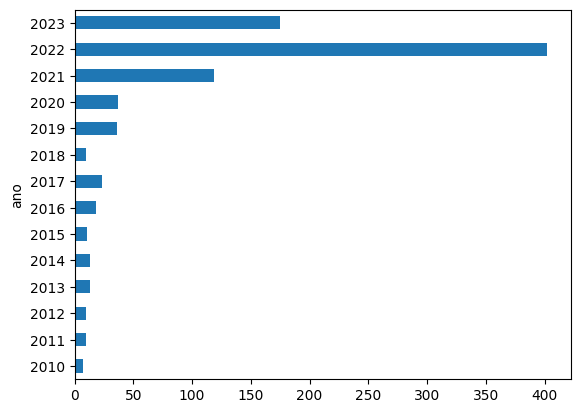

In [22]:
# 6 Faça um gráfico de barras horizontais mostrando os dados que foram selecionados no item 5.

musicas.groupby('ano').size().plot(kind='barh', legend=False)


In [14]:
# 7 Das 20 músicas mais reproduzidas em 2023, quantas foram lançadas durante o verão? (considere o verão no hemisfério norte) entre junho e setembro

musica_reproduzida = df[(df['ano'] == 2023)].sort_values(by='reproducoes_milhoes', ascending=False )[0:20] #filtro para pegar somente o ano 2023 e ordenar as 20 maiores
musica_reproduzida = musica_reproduzida[((musica_reproduzida['dia'] >= 20) & (musica_reproduzida['mes'] >= 6)) & ((musica_reproduzida['dia'] <= 23) & (musica_reproduzida['mes'] <= 9))] #são filtros de pesquisa de onde vai ocorrer as comparações pra tirar as informações que quero
musica_reproduzida.groupby('ano').size() #fiz agrupamento pela coluna ano pra me mostrar a contagem (logo sendo a contagem de linha)

display(musica_reproduzida.sort_values(by='reproducoes_milhoes', ascending=False )) #apresentar resultado na tela, com ordenação em ordem decrescente

,titulo,artista,ano,mes,dia,bpm,tom,modo,reproducoes_milhoes


In [16]:
# 8 Das 20 músicas mais reproduzidas em 2023, quantas possuem um andamento inferior a 100 bpm?

musica_bpm =df[(df['ano'] == 2023)].sort_values(by='reproducoes_milhoes', ascending=False )[0:20] #filtro para pegar somente o ano 2023 e ordenar as 20 maiores
musica_bpm = musica_bpm[((musica_bpm['bpm'] < 100))] #filtro para pegar somente as menores que 100 bpm
musica_bpm.groupby('ano').size() #fiz agrupamento pela coluna ano pra me mostrar a contagem (logo sendo a contagem de linha)

display(musica_bpm.sort_values(by='reproducoes_milhoes', ascending=False ))

,titulo,artista,ano,mes,dia,bpm,tom,modo,reproducoes_milhoes
49,die for you - remix,"ariana grande, the weeknd",2023,2,24,67,C#,menor,518.75
10,un x100to,"bad bunny, grupo frontera",2023,4,17,83,F#,menor,505.67
63,beso,"rauw alejandro, rosalï¿½",2023,3,24,95,F,menor,357.93
181,fin de semana,"oscar maydon, junior h",2023,1,13,98,NaN,maior,307.37


In [17]:
# 9 Das 20 músicas mais reproduzidas em 2023, quantas estão na tonalidade de Dó Sustenido (C#) Maior?

musica_tonalidade =df[(df['ano'] == 2023)].sort_values(by='reproducoes_milhoes', ascending=False )[0:20]
musica_tonalidade = musica_tonalidade[(musica_tonalidade['tom'] == 'C#') & (musica_tonalidade['modo'] == 'maior')]
musica_tonalidade.groupby('ano').size()

display(musica_tonalidade.sort_values(by='reproducoes_milhoes', ascending=False ))

,titulo,artista,ano,mes,dia,bpm,tom,modo,reproducoes_milhoes


In [18]:
 ## 10 Das 20 músicas mais reproduzidas em 2023, qual é o modo majoritário?
musica_majoritario =df[(df['ano'] == 2023)].sort_values(by='reproducoes_milhoes', ascending=False )[0:20]
musica_majoritario = musica_majoritario[(musica_majoritario['modo'] == 'maior')]
musica_majoritario.groupby('ano').size()

display(musica_majoritario.sort_values(by='reproducoes_milhoes', ascending=False ))

,titulo,artista,ano,mes,dia,bpm,tom,modo,reproducoes_milhoes
12,flowers,miley cyrus,2023,1,12,118,NaN,maior,1316.86
28,last night,morgan wallen,2023,1,31,204,F#,maior,429.83
19,like crazy,jimin,2023,3,24,120,G,maior,363.37
18,classy 101,"feid, young miko",2023,3,31,100,B,maior,335.22
181,fin de semana,"oscar maydon, junior h",2023,1,13,98,NaN,maior,307.37
